In [1]:
!pip install retina-face # Installs the 'retina-face' package, which provides the RetinaFace class.
!pip install mtcnn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.0 MB/s eta 0:00:00


In [2]:
!pip install face_recognition opencv-python
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=7ffc5db1e77c52377880b9dee735412ddd661269de4877fcb61d95b369426cf1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [13]:
# face_image.shape


(290, 230, 3)

In [3]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from google.colab import files  # To upload files


In [13]:
def identify_user_in_group(group_photo_array, user_image_array, tolerance=0.6):
    """
    Compares the user's face (from the user image) to faces in a group photo
    and identifies if the user is present in the group.

    Args:
        group_photo_array: NumPy array of the group photo.
        user_image_array: NumPy array of the user's image.
        tolerance: Face distance tolerance for a match (lower is more strict).
                   Default is 0.6.

    Returns:
        matched_faces: List of NumPy arrays of the matched faces from the group.
    """

    # Encode faces in the group photo
    group_face_encodings = face_recognition.face_encodings(group_photo_array)
    group_face_locations = face_recognition.face_locations(group_photo_array)

    # Debugging: Print number of faces detected in the group photo
    print(f"Number of faces detected in the group photo: {len(group_face_encodings)}")

    # Encode the user's face from the uploaded user image
    user_face_encodings = face_recognition.face_encodings(user_image_array)

    if len(user_face_encodings) == 0:
        print("No faces found in the user image.")
        return []

    user_face_encoding = user_face_encodings[0]

    # Compare the user's face against all faces in the group photo
    face_distances = face_recognition.face_distance(group_face_encodings, user_face_encoding)

    # Store matched faces
    matched_faces = []

    # Find matches within the tolerance
    match_found = False
    for i, face_distance in enumerate(face_distances):
        print(f"Face distance for face {i}: {face_distance}")  # Debugging face distance

        if face_distance <= tolerance:
            match_found = True
            top, right, bottom, left = group_face_locations[i]
            matched_face = group_photo_array[top:bottom, left:right]

            # Append the matched face to the list
            matched_faces.append(matched_face)

    if not match_found:
        print("User not found in the group photo.")
    else:
        print(f"Found {len(matched_faces)} match(es).")
        # Display matched faces
        for face in matched_faces:
            cv2_imshow(face)

    return matched_faces


In [14]:
import pandas as pd

In [15]:
def upload_photos():
    # Upload group photo
    print("Please upload the group photo:")
    uploaded_group = files.upload()
    group_photo_path = list(uploaded_group.keys())[0]
    group_photo_array = face_recognition.load_image_file(group_photo_path)

    # Upload user image (single person)
    print("Please upload the user's single photo:")
    uploaded_user = files.upload()
    user_image_path = list(uploaded_user.keys())[0]
    user_image_array = face_recognition.load_image_file(user_image_path)

    return group_photo_array, user_image_array


Please upload the group photo:


Saving Group_photo.jpg to Group_photo (2).jpg
Please upload the user's single photo:


Saving chetan.jpg to chetan (2).jpg
Number of faces detected in the group photo: 13
Face distance for face 0: 0.7986581168746275
Face distance for face 1: 0.6460042692180564
Face distance for face 2: 0.6754206847908661
Face distance for face 3: 0.7041401245471818
Face distance for face 4: 0.6360175462304472
Face distance for face 5: 0.5888729553500002
Face distance for face 6: 0.7983588665611796
Face distance for face 7: 0.6672067296062867
Face distance for face 8: 0.6861371003310749
Face distance for face 9: 0.49046335046814116
Face distance for face 10: 0.7211552759181291
Face distance for face 11: 0.6654848872113649
Face distance for face 12: 0.6901590096518639
Found 1 match(es).


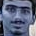

1 face(s) matched.


In [18]:
def main():
    # Upload the group and user images
    group_photo_array, user_image_array = upload_photos()

    # Set tolerance level for face matching
    tolerance = 0.5  # Adjust as needed (lower is more strict)

    # Call the function to identify the user in the group photo
    matched_faces = identify_user_in_group(group_photo_array, user_image_array, tolerance)

    # Output matched faces
    if matched_faces:
        print(f"{len(matched_faces)} face(s) matched.")
    else:
        print("No matches found.")

# Run the main function
main()
